In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import plots # Custom functions for plotting

# Tricking your cerebellum
## Exercise 4 – Motor Noise (Group A)

By: Ieva Kerseviciute* and Robin Uhrich*

*equal contribution

## Task 1: Implementation of motor noise

### Implement motor noise as additional perturbation

We define these global variables to control the noise strength throughout the blocks and each invididual trial:

```{python}
noise_mean = 0
noise_std = 0
noise_active = False
noise_instance = 0
```

The noise is sampled from a random distribution:

```{python}
def sample_random_noise():
    global noise_mean, noise_std
    return np.random.normal(noise_mean, noise_std)
```

Noise is applied as soon as the pint leaves the control zone:

```{python}
def apply_noise():
    global pint_velocity, noise_instance
    pint_velocity[0] += noise_instance

# PINT_MOVEMENTS
def handle_mouse_input():
    ...
    else:
        ...
        apply_noise()
       ...
    ...
```

### Display the text 'Drinking beer' and light up the yellow in the beer pint after the motor noise has been increased

We display the text and change the color of the beer when setting up the block. Noise parameters are set when defining the blocks:

```{python}
def setup_block(block_number):
    ...

    drink_beer = block.get("drink_beer", False)
    if drink_beer:
        display_message("Drinking beer!", length = 2000)
        beer_alpha -= beer_alpha_decrease
        if friction + friction_decrease < 1:
            friction += friction_decrease

    noise_active = block.get("noise_active", False)
    noise_mean = block.get("noise_mean", 0)
    noise_std = block.get("noise_std", 0)

    # Generate new perturbation noise
    if noise_active:
        noise_instance = sample_random_noise()
    else:
        noise_instance = 0

    ...
```

### Design your own experiment to test effect of motor noise

```{python}
small_noise_mean = 0
small_noise_std = 1

medium_noise_mean = 1.5
medium_noise_std = 2

large_noise_mean = 2.5
large_noise_std = 3

sudden_force = 2
n_trials_no_perturbation = 10
n_trials_perturbation = 30
feedback_setting = "endpos"

block_structure = [
    # 1
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": False,
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_perturbation,
        "perturbation": True, "gradual": False, "sudden_force": sudden_force,
        "drink_beer": False,
        "noise_active": False
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": False
    },

    # 2
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": True,
        "noise_active": True, "noise_mean": small_noise_mean, "noise_std": small_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_perturbation,
        "perturbation": True, "gradual": False, "sudden_force": sudden_force,
        "drink_beer": False,
        "noise_active": True, "noise_mean": small_noise_mean, "noise_std": small_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": True, "noise_mean": small_noise_mean, "noise_std": small_noise_std
    },

    # 3
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": True,
        "noise_active": True, "noise_mean": medium_noise_mean, "noise_std": medium_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_perturbation,
        "perturbation": True, "gradual": False, "sudden_force": sudden_force,
        "drink_beer": False,
        "noise_active": True, "noise_mean": medium_noise_mean, "noise_std": medium_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": True, "noise_mean": medium_noise_mean, "noise_std": medium_noise_std
    },

    # 4
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": True,
        "noise_active": True, "noise_mean": large_noise_mean, "noise_std": large_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_perturbation,
        "perturbation": True, "gradual": False, "sudden_force": sudden_force,
        "drink_beer": False,
        "noise_active": True, "noise_mean": large_noise_mean, "noise_std": large_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": True, "noise_mean": large_noise_mean, "noise_std": large_noise_std
    }
]
```


## Task 2: Analysis of motor noise on unbiased subjects

By the end of the trials, the unbiased subject got a bit annoyed with the task and tended to perform shorter throws in order to get the experiment over with quicker.

In [2]:
small_noise_mean = 0
small_noise_std = 1

medium_noise_mean = 1.5
medium_noise_std = 2

large_noise_mean = 2.5
large_noise_std = 3

x = np.linspace(-10, 12, 1000)
y_small = norm.pdf(x, small_noise_mean, small_noise_std)
y_medium = norm.pdf(x, medium_noise_mean, medium_noise_std)
y_large = norm.pdf(x, large_noise_mean, large_noise_std)

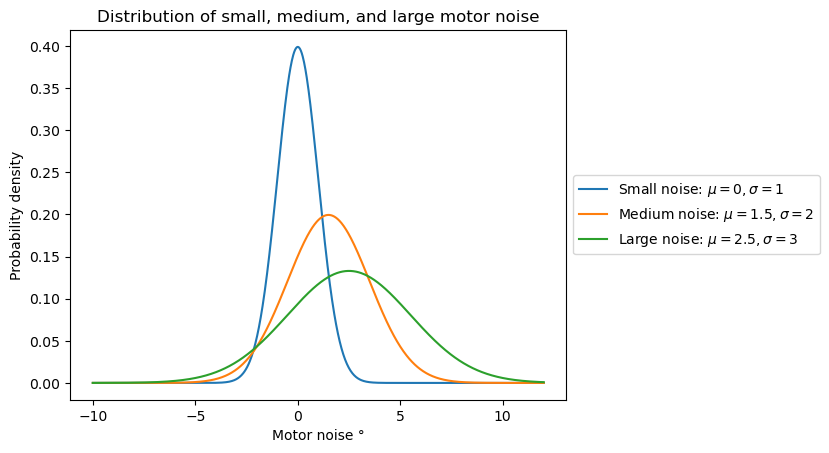

In [3]:
plt.plot(x, y_small, label = rf"Small noise: $\mu = {small_noise_mean}, \sigma = {small_noise_std}$")
plt.plot(x, y_medium, label = rf"Medium noise: $\mu = {medium_noise_mean}, \sigma = {medium_noise_std}$")
plt.plot(x, y_large, label = rf"Large noise: $\mu = {large_noise_mean}, \sigma = {large_noise_std}$")
plt.xlabel("Motor noise °")
plt.ylabel("Probability density")
plt.title("Distribution of small, medium, and large motor noise")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

**Figure 1.** Motor noise used throughout the experiment.

In [4]:
# Read subject data
experiment, full_experiment = plots.define_experiment()

subject1 = pd.read_csv("Subject_1.csv")
subject1 = pd.merge(subject1, full_experiment, on = "Trial")

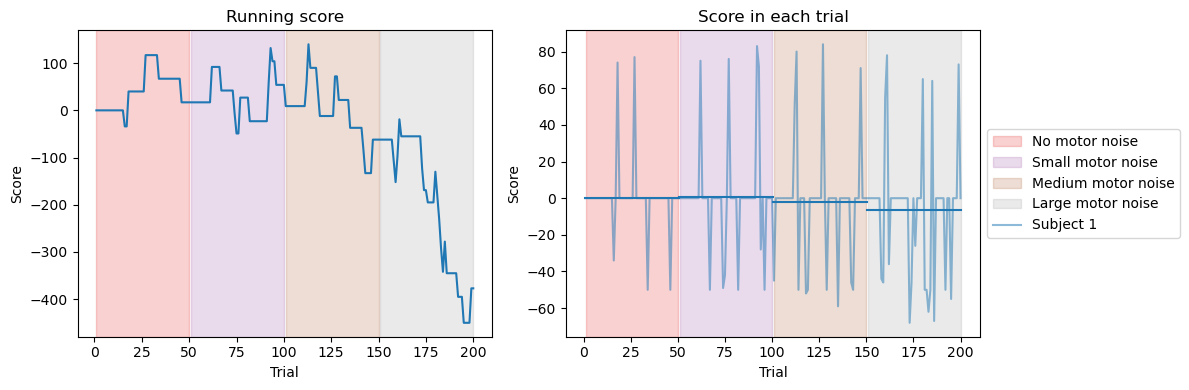

In [5]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
plots.plot_running_score(experiment, subjects = [subject1], ax = axs[0], show_legend = False)
plots.plot_trial_score(experiment, subjects = [subject1], ax = axs[1])
fig.tight_layout()

**Figure 2.** (Left) The running score across the experiment and (right) the score for each trial, with vertical lines representing the mean score for each block, for subject 1. The different experimental blocks are visually highlighted. The subject shows a significant decline in performance during the final block.

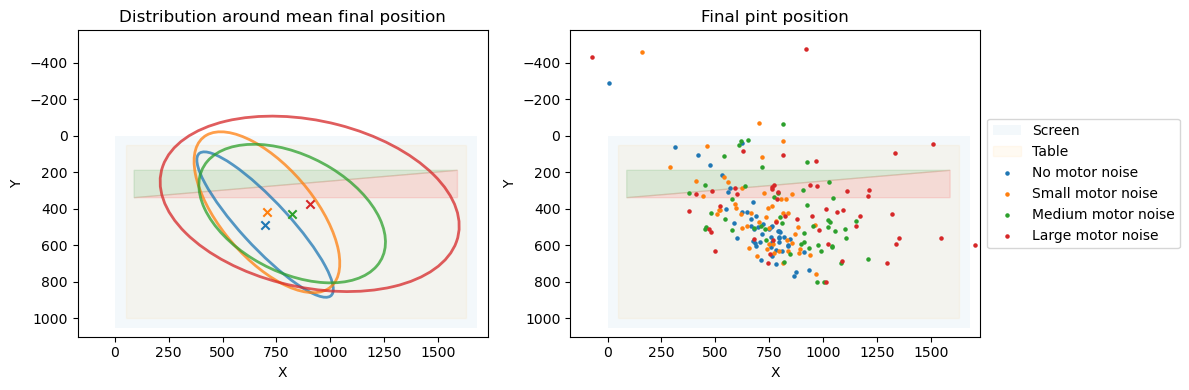

In [6]:
plots.plot_throw_positions(subject1)

**Figure 3.1.** Final pint positions for subject 1. (Right) The mean final position, marked by a cross, and its error, marked by the confidence ellipse. (Left) Final pint position for all trials. The experimental blocks are marked by different colors. The variability of the final position tends to increase with increasing motor noise.

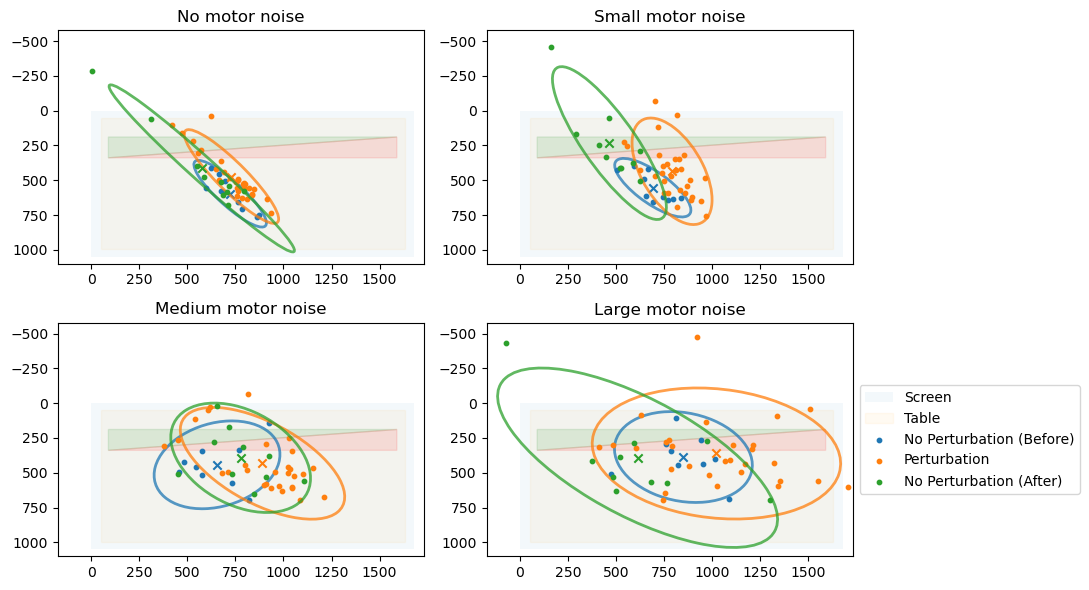

In [7]:
plots.plot_throw_perturbation(subject1)

**Figure 3.2.** Final pint positions, their mean and confidence ellipse during no perturbation and perturbation periods of each experimental block for subject 1. For all blocks, perturbed attempts are shifted in the direction of perturbation. For small motor noise and large motor noise there is a visible after-effect, and the mean of the final position is shifted in the direction opposite to perturbation.